# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np

# Making x_train and y_train
This is done by defining an empty numpy array and adding the images from training set to it

In [2]:
from skimage import color
from skimage import io
x_train=np.empty((42000,28,28),dtype='uint8')
y_train = np.empty((42000,1),dtype='uint8')
c = 0
for x in range(10):
    training_folder = "trainingSet/trainingSet/"+str(x)
    X_train_file=[f for f in os.listdir(training_folder) if os.path.isfile(os.path.join(training_folder, f))] 
    for z in X_train_file:
        x_train[c] = np.array(io.imread('trainingSet/trainingSet/'+str(x)+'/'+z))
        y_train[c] = x
        c+=1

# Making x_test and y_test

In [3]:
x_test=np.empty((600,28,28),dtype='uint8')
y_test = np.empty((600,1),dtype='uint8')
c = 0
for x in range(10):
    testing_folder = "trainingSample/trainingSample/"+str(x)
    X_test_file=[f for f in os.listdir(testing_folder) if os.path.isfile(os.path.join(testing_folder, f))] 
    for z in X_test_file:
        x_test[c] = np.array(io.imread('trainingSample/trainingSample/'+str(x)+'/'+z))
        y_test[c] = x
        c+=1

# Printing type and shape of x_train, x_test, y_train and y_test

In [4]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 28, 28)
(600, 28, 28)
(42000, 1)
(600, 1)


# Showing Images


<Figure size 432x288 with 0 Axes>

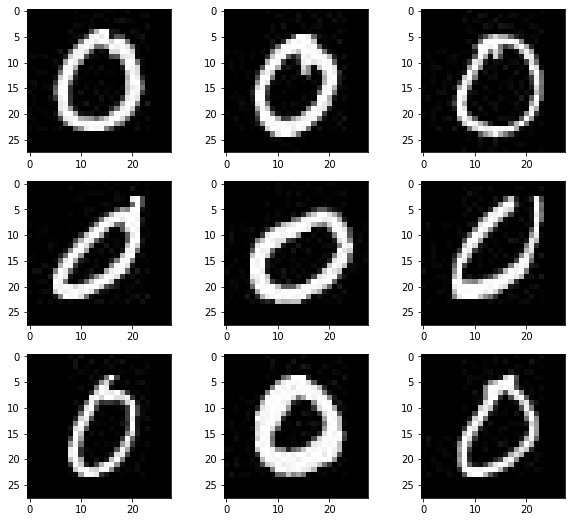

In [6]:
plt.gray()
plt.figure(figsize = (10,9)) 
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

# Printing nums in y_train

In [7]:
for i in range(5):
    print(y_train[i])

[0]
[0]
[0]
[0]
[0]


# Checking the minimum and maximum values of x_train

In [8]:
print(x_train.min())
print(x_train.max())

0
255


# Data Normalization
# Conversion to float

In [9]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
print(x_train.min())
print(x_train.max())

0.0
1.0


# Reshaping input data

In [11]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [12]:
# Checking the shape
print(X_train.shape)
print(X_test.shape)

(42000, 784)
(600, 784)


# Applying KMeans Clustering

In [13]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [14]:
kmeans.labels_

array([2, 2, 2, ..., 8, 0, 6], dtype=int32)

In [15]:
y_train =  np.concatenate(y_train)
y_test =  np.concatenate(y_test)

In [16]:
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [17]:
y_train.shape

(42000,)

In [18]:
def retrieve_info(cluster_labels,y_train):
    reference_labels = {} # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [19]:
retrieve_info(kmeans.labels_,y_train)

{0: 7, 1: 8, 2: 0, 3: 1, 4: 6, 5: 2, 6: 4, 7: 0, 8: 3, 9: 6}

In [20]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

# Comparing Predicted values and Actual values

In [21]:
print(number_labels[:20].astype('int'))
print(y_train[:20])

[0 0 0 0 0 0 6 6 0 0 0 0 0 0 6 0 6 0 6 6]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Accuracy 

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5209285714285714


# Technique to improve accuracy 
Printing the accuracy as the no of clusters increase

In [23]:
def calculate_metrics(model,output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [24]:
from sklearn import metrics
cluster_number = [10,16,36,64,156,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))# Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)# Fitting the model to training set
    kmeans.fit(X_train)# Calculating the metrics
    calculate_metrics(kmeans,y_train)# Calculating reference_labels
    reference_labels = retrieve_info(kmeans.labels_,y_train)# ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))
    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
    print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
    print('\n')

Number of clusters is 10
Inertia : 1599425.318725586
Homogeneity :       0.4424669721198265
Accuracy score : 0.5406428571428571


Number of clusters is 16
Inertia : 1494584.0773925781
Homogeneity :       0.5791575638879398
Accuracy score : 0.674047619047619


Number of clusters is 36
Inertia : 1323273.7880859375
Homogeneity :       0.6900442017198931
Accuracy score : 0.7606190476190476


Number of clusters is 64
Inertia : 1229157.4685058594
Homogeneity :       0.7373274101555031
Accuracy score : 0.7993809523809524


Number of clusters is 156
Inertia : 1089437.1723632812
Homogeneity :       0.8128118256414537
Accuracy score : 0.8748095238095238


Number of clusters is 256
Inertia : 1026744.5736694336
Homogeneity :       0.8400556391915025
Accuracy score : 0.8927380952380952




We can see a trend that as the no of clusters increase the models accuracy increases and hence an optimum amount of clusters = 156 has been selected to have the accuracy of 82.5

In [32]:
kmeans = MiniBatchKMeans(n_clusters = 156)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 156
Inertia : 11468.128051757812
Homogeneity :       0.8244728346081819
Accuracy score : 0.825




# Cluster centroids is stored in ‘centroids’

In [33]:
centroids = kmeans.cluster_centers_

In [34]:
centroids.shape

(156, 784)

In [35]:
centroids = centroids.reshape(156,28,28)

In [36]:
centroids = centroids * 255

Plotting the images for centroids

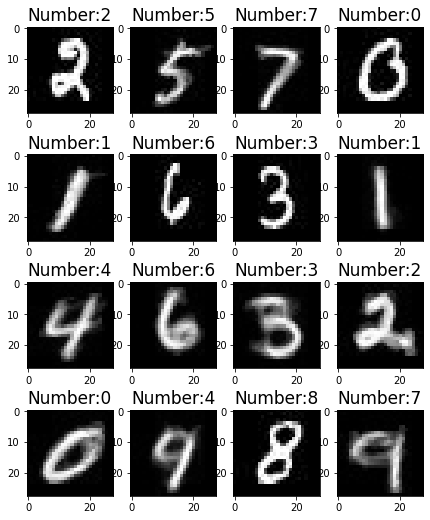

In [37]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
    plt.imshow(centroids[i])

# Reading the image for testing a specific image 

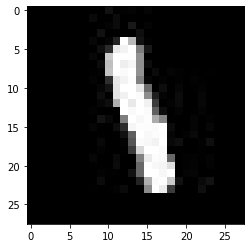

In [74]:
image = plt.imread('testSample/testSample/img_39.jpg')
plt.imshow(image)

In [75]:
image.shape

(28, 28)

# RGB image is converted to Monochrome image

In [76]:
from skimage import color
from skimage import io
image = io.imread('testSample/testSample/img_39.jpg')

# Reshaping into a row vector

In [77]:
image = image.reshape(1,28*28)

In [78]:
image = image.astype(np.float32)
predicted_cluster = kmeans.predict(image)

# Showing the prediction outcome

In [79]:
number_labels[[predicted_cluster]]

/Users/n_rishabh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([1.])

# We get an accuracy of 82.5 which shows that the predictions made are correctly given by the KMeans model